# Credit Risk Classification

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the Dataset

In [2]:
file_path: str = '../data/german.data'

column_names = [
    'status_account', 'duration_months', 'credit_history', 'purpose',
    'credit_amount', 'savings_account', 'employment_since', 'installment_rate',
    'personal_status', 'other_debtors', 'present_residence_since',
    'property', 'age', 'other_installment_plans', 'housing',
    'number_existing_credits', 'job', 'people_liable', 'telephone',
    'foreign_worker', 'credit_risk'
]

df = pd.read_csv(file_path, sep=' ', header=None, names=column_names)

# 1 → good (low risk)
# 2 → bad (high risk)
df['credit_risk'] = df['credit_risk'].map({1: 'good', 2: 'bad'})

df.head()

,status_account,duration_months,credit_history,purpose,credit_amount,savings_account,employment_since,installment_rate,personal_status,other_debtors,...,property,age,other_installment_plans,housing,number_existing_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,good
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,bad
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,good
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,good
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,bad


### Mapping Categorical Variables

In [3]:
status_map = {
    'A11': '... < 0 DM',
    'A12': '0 <= ... < 200 DM',
    'A13': '>= 200 DM / salary',
    'A14': 'no checking account'
}

df['status_account'] = df['status_account'].map(status_map)
df['status_account']

0               ... < 0 DM
1        0 <= ... < 200 DM
2      no checking account
3               ... < 0 DM
4               ... < 0 DM
              ...         
995    no checking account
996             ... < 0 DM
997    no checking account
998             ... < 0 DM
999      0 <= ... < 200 DM
Name: status_account, Length: 1000, dtype: object

In [4]:
credit_history_map = {
    'A30': 'no credits taken/all credits paid back duly',
    'A31': 'all credits at this bank paid back duly',
    'A32': 'existing credits paid back duly till now',
    'A33': 'delay in paying off in the past',
    'A34': 'critical account/other credits existing (not at this bank)'
}

df['credit_history'] = df['credit_history'].map(credit_history_map)
df['credit_history']

0      critical account/other credits existing (not a...
1               existing credits paid back duly till now
2      critical account/other credits existing (not a...
3               existing credits paid back duly till now
4                        delay in paying off in the past
                             ...                        
995             existing credits paid back duly till now
996             existing credits paid back duly till now
997             existing credits paid back duly till now
998             existing credits paid back duly till now
999    critical account/other credits existing (not a...
Name: credit_history, Length: 1000, dtype: object

In [5]:
purpose_map = {
    'A40': 'car (new)',
    'A41': 'car (used)',
    'A42': 'furniture/equipment',
    'A43': 'radio/television',
    'A44': 'domestic appliances',
    'A45': 'repairs',
    'A46': 'education',
    'A47': '(vacation - does not exist?)',
    'A48': 'retraining',
    'A49': 'business',
    'A410': 'others'
}

df['purpose'] = df['purpose'].map(purpose_map)
df['purpose']

0         radio/television
1         radio/television
2                education
3      furniture/equipment
4                car (new)
              ...         
995    furniture/equipment
996             car (used)
997       radio/television
998       radio/television
999             car (used)
Name: purpose, Length: 1000, dtype: object

In [6]:
s_account_map = {
    'A61': '... < 100 DM',
    'A62': '100 <= ... < 500 DM',
    'A63': '500 <= ... < 1000 DM',
    'A64': '... >= 1000 DM',
    'A65': 'unknown/no savings account'
}

df['savings_account'] = df['savings_account'].map(s_account_map)
df['savings_account']

0      unknown/no savings account
1                    ... < 100 DM
2                    ... < 100 DM
3                    ... < 100 DM
4                    ... < 100 DM
                  ...            
995                  ... < 100 DM
996                  ... < 100 DM
997                  ... < 100 DM
998                  ... < 100 DM
999           100 <= ... < 500 DM
Name: savings_account, Length: 1000, dtype: object

In [7]:
emp_map = {
    'A71': 'unemployed',
    'A72': '... < 1 year',
    'A73': '1 <= ... < 4 years',
    'A74': '4 <= ... < 7 years',
    'A75': '... >= 7 years'
}

df['employment_since'] = df['employment_since'].map(emp_map)
df['employment_since']

0          ... >= 7 years
1      1 <= ... < 4 years
2      4 <= ... < 7 years
3      4 <= ... < 7 years
4      1 <= ... < 4 years
              ...        
995    4 <= ... < 7 years
996    1 <= ... < 4 years
997        ... >= 7 years
998    1 <= ... < 4 years
999            unemployed
Name: employment_since, Length: 1000, dtype: object

In [8]:
sex_map = {
    'A91': 'F',
    'A92': 'F',
    'A93': 'M',
    'A94': 'M',
    'A95': 'F'
}

status_map = {
    'A91': 'divorced/separated',
    'A92': 'divorced/separated/married',
    'A93': 'single',
    'A94': 'married/widowed',
    'A95': 'single'
}

df['sex'] = df['personal_status'].map(sex_map)
df['personal_status'] = df['personal_status'].map(status_map)

df[['personal_status', 'sex']]

,personal_status,sex
0,single,M
1,divorced/separated/married,F
2,single,M
3,single,M
4,single,M
...,...,...
995,divorced/separated/married,F
996,divorced/separated,F
997,single,M
998,single,M


In [9]:
debtors_map = {
    'A101': 'none',
    'A102': 'co-applicant',
    'A103': 'guarantor'
}

df['other_debtors'] = df['other_debtors'].map(debtors_map)
df['other_debtors']

0           none
1           none
2           none
3      guarantor
4           none
         ...    
995         none
996         none
997         none
998         none
999         none
Name: other_debtors, Length: 1000, dtype: object

In [10]:
property_map = {
    'A121': 'real estate',
    'A122': 'building society savings agreement/life insurance',
    'A123': 'car or other, not in attribute 6',
    'A124': 'unknown/no property'
}

df['property'] = df['property'].map(property_map)
df['property']

0                                            real estate
1                                            real estate
2                                            real estate
3      building society savings agreement/life insurance
4                                    unknown/no property
                             ...                        
995                                          real estate
996    building society savings agreement/life insurance
997                     car or other, not in attribute 6
998                                  unknown/no property
999                     car or other, not in attribute 6
Name: property, Length: 1000, dtype: object

In [11]:
installment_map = {
    'A141': 'bank',
    'A142': 'stores',
    'A143': 'none'
}

df['other_installment_plans'] = df['other_installment_plans'].map(installment_map)
df['other_installment_plans']

0      none
1      none
2      none
3      none
4      none
       ... 
995    none
996    none
997    none
998    none
999    none
Name: other_installment_plans, Length: 1000, dtype: object

In [12]:
housing_map = {
    'A151': 'rent',
    'A152': 'own',
    'A153': 'for free'
}

df['housing'] = df['housing'].map(housing_map)
df['housing']

0           own
1           own
2           own
3      for free
4      for free
         ...   
995         own
996         own
997         own
998    for free
999         own
Name: housing, Length: 1000, dtype: object

In [13]:
job_map = {
    'A171': 'unemployed/unskilled - non-resident',
    'A172': 'unskilled - resident',
    'A173': 'skilled employee/official',
    'A174': 'management/self-employed/highly qualified employee/officer'
}

df['job'] = df['job'].map(job_map)
df['job']

0                              skilled employee/official
1                              skilled employee/official
2                                   unskilled - resident
3                              skilled employee/official
4                              skilled employee/official
                             ...                        
995                                 unskilled - resident
996    management/self-employed/highly qualified empl...
997                            skilled employee/official
998                            skilled employee/official
999                            skilled employee/official
Name: job, Length: 1000, dtype: object

In [14]:
telephone_map = {
    'A191': 'none',
    'A192': 'yes, registered under the customers name'
}

df['telephone'] = df['telephone'].map(telephone_map)
df['telephone']

0      yes, registered under the customers name
1                                          none
2                                          none
3                                          none
4                                          none
                         ...                   
995                                        none
996    yes, registered under the customers name
997                                        none
998    yes, registered under the customers name
999                                        none
Name: telephone, Length: 1000, dtype: object

In [15]:
df['foreign_worker'] = df['foreign_worker'].map(
    {
        'A201': 'yes',
        'A202': 'no'
    }
)
df['foreign_worker']

0      yes
1      yes
2      yes
3      yes
4      yes
      ... 
995    yes
996    yes
997    yes
998    yes
999    yes
Name: foreign_worker, Length: 1000, dtype: object

In [16]:
df

,status_account,duration_months,credit_history,purpose,credit_amount,savings_account,employment_since,installment_rate,personal_status,other_debtors,...,age,other_installment_plans,housing,number_existing_credits,job,people_liable,telephone,foreign_worker,credit_risk,sex
0,... < 0 DM,6,critical account/other credits existing (not a...,radio/television,1169,unknown/no savings account,... >= 7 years,4,single,none,...,67,none,own,2,skilled employee/official,1,"yes, registered under the customers name",yes,good,M
1,0 <= ... < 200 DM,48,existing credits paid back duly till now,radio/television,5951,... < 100 DM,1 <= ... < 4 years,2,divorced/separated/married,none,...,22,none,own,1,skilled employee/official,1,none,yes,bad,F
2,no checking account,12,critical account/other credits existing (not a...,education,2096,... < 100 DM,4 <= ... < 7 years,2,single,none,...,49,none,own,1,unskilled - resident,2,none,yes,good,M
3,... < 0 DM,42,existing credits paid back duly till now,furniture/equipment,7882,... < 100 DM,4 <= ... < 7 years,2,single,guarantor,...,45,none,for free,1,skilled employee/official,2,none,yes,good,M
4,... < 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,single,none,...,53,none,for free,2,skilled employee/official,2,none,yes,bad,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking account,12,existing credits paid back duly till now,furniture/equipment,1736,... < 100 DM,4 <= ... < 7 years,3,divorced/separated/married,none,...,31,none,own,1,unskilled - resident,1,none,yes,good,F
996,... < 0 DM,30,existing credits paid back duly till now,car (used),3857,... < 100 DM,1 <= ... < 4 years,4,divorced/separated,none,...,40,none,own,1,management/self-employed/highly qualified empl...,1,"yes, registered under the customers name",yes,good,F
997,no checking account,12,existing credits paid back duly till now,radio/television,804,... < 100 DM,... >= 7 years,4,single,none,...,38,none,own,1,skilled employee/official,1,none,yes,good,M
998,... < 0 DM,45,existing credits paid back duly till now,radio/television,1845,... < 100 DM,1 <= ... < 4 years,4,single,none,...,23,none,for free,1,skilled employee/official,1,"yes, registered under the customers name",yes,bad,M


### Exploratory Data Analysis (EDA)

Ditribution of decision variable - is the dataset balanced?

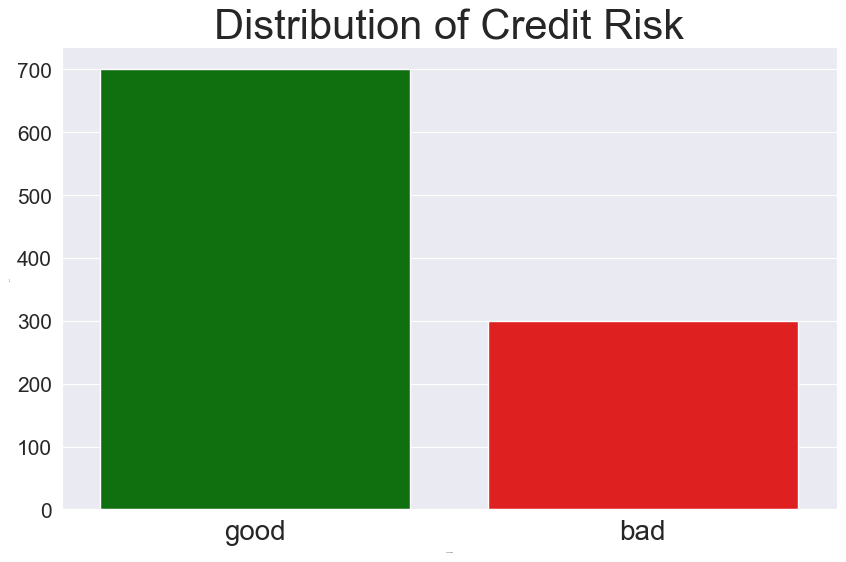

In [17]:
plt.figure(figsize=(10, 6))
sns.countplot(
    x='credit_risk',
    data=df,
    hue='credit_risk',
    palette={'good': 'green', 'bad': 'red'},
    legend=False
)

plt.title('Distribution of Credit Risk', fontsize=30)

plt.xlabel('Credit Risk', fontsize=0)
plt.ylabel('Count', fontsize=0)

plt.xticks(fontsize=20)
plt.yticks(fontsize=15)

plt.show()

Does older customer mean less risk?

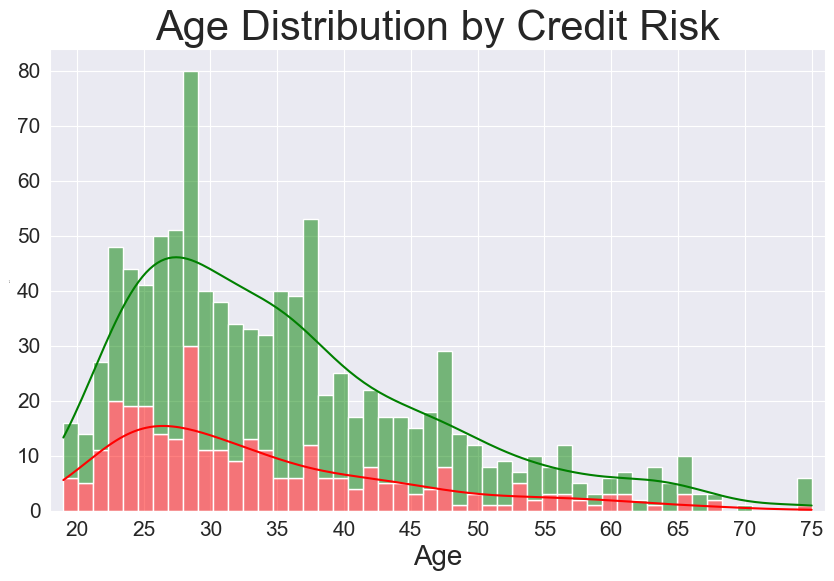

In [18]:
plt.figure(figsize=(10, 6))
sns.histplot(
    data=df,
    x='age',
    hue='credit_risk',
    multiple='stack',
    bins=50,
    palette={'good': 'green', 'bad': 'red'},
    kde=True,
    legend=False,
)

plt.title('Age Distribution by Credit Risk', fontsize=30)

plt.xlabel('Age', fontsize=20)
plt.ylabel('Count', fontsize=0)

plt.yticks(fontsize=15)

min_age = df['age'].min()
max_age = df['age'].max()
plt.xticks(
    ticks=np.arange(15, 100, 5),
    fontsize=15
)
plt.xlim(min_age-1, max_age+1)

plt.show()

Credit Amount by Risk Category - does higher credit mean higher risk?

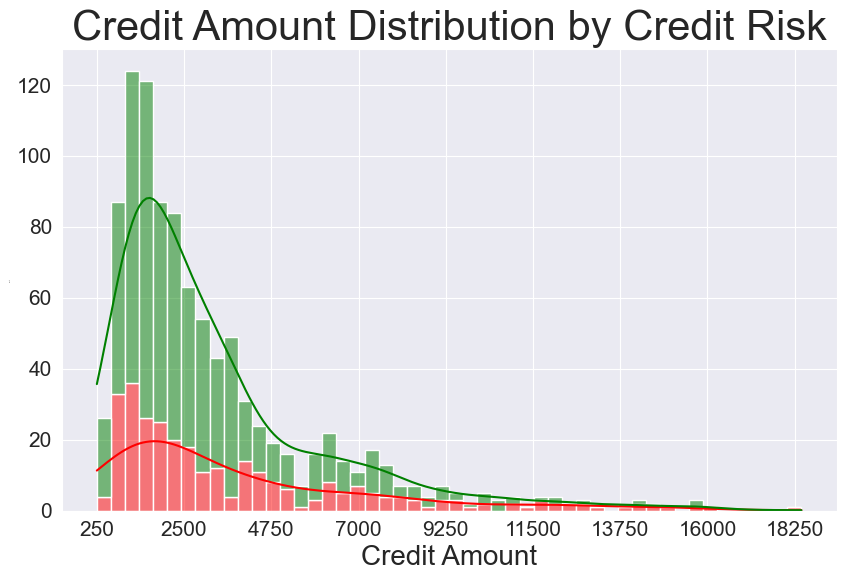

In [19]:
plt.figure(figsize=(10, 6))
sns.histplot(
    data=df,
    x='credit_amount',
    hue='credit_risk',
    multiple='stack',
    bins=50,
    palette={'good': 'green', 'bad': 'red'},
    kde=True,
    legend=False,
)

plt.title('Credit Amount Distribution by Credit Risk', fontsize=30)
plt.xlabel('Credit Amount', fontsize=20)
plt.ylabel('Count', fontsize=0)
plt.yticks(fontsize=15)
min_credit = df['credit_amount'].min()
max_credit = df['credit_amount'].max()
plt.xticks(
    ticks=np.arange(min_credit, max_credit, 2_250),
    fontsize=15
)

plt.show()

Loan Purpose vs Risk - are some loan types riskier than others?

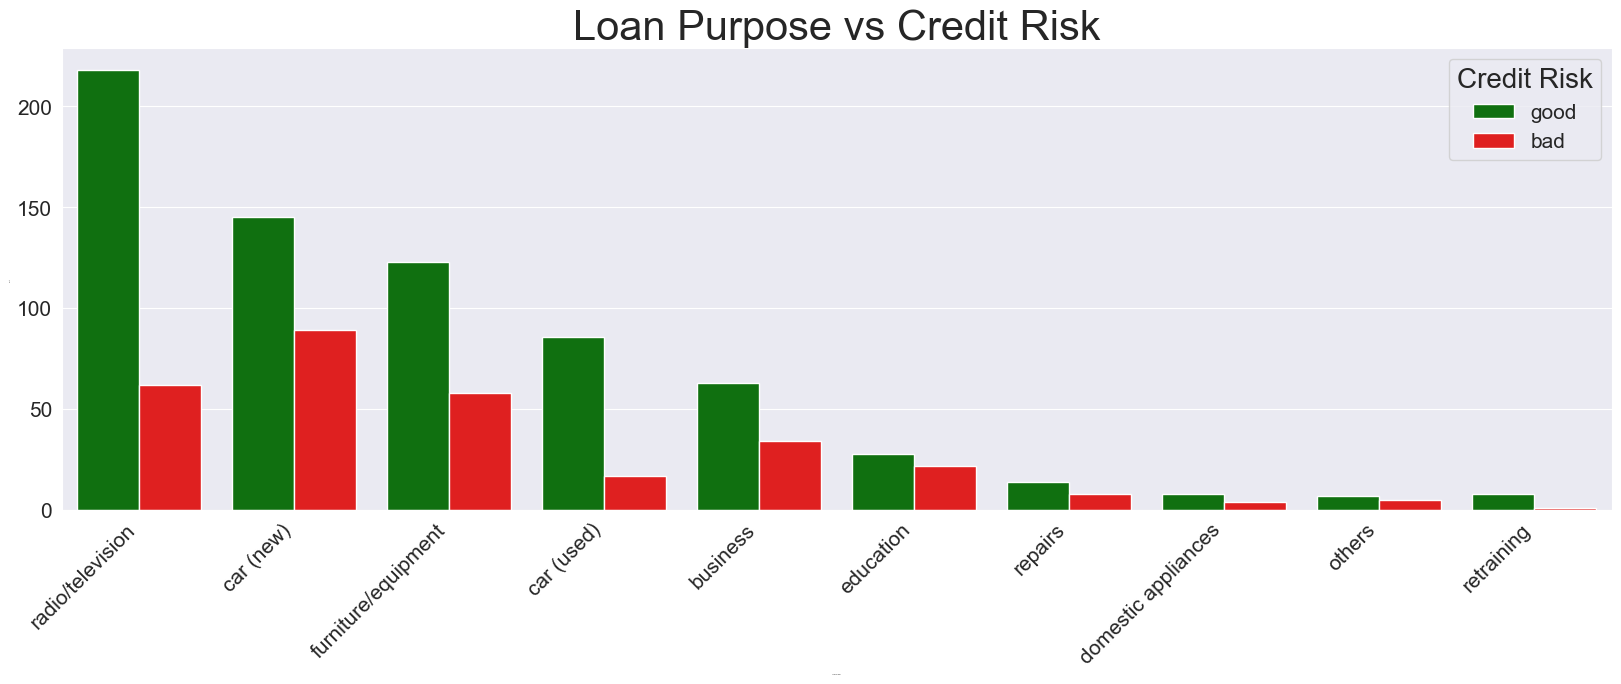

In [20]:
plt.figure(figsize=(20, 6))
sns.countplot(
    data=df,
    x='purpose',
    hue='credit_risk',
    palette={'good': 'green', 'bad': 'red'},
    order=df['purpose'].value_counts().index
)

plt.title('Loan Purpose vs Credit Risk', fontsize=30)
plt.xlabel('Loan Purpose', fontsize=0)
plt.ylabel('Count', fontsize=0)
plt.xticks(rotation=45, fontsize=15, ha='right')
plt.yticks(fontsize=15)
plt.legend(title='Credit Risk', fontsize=15, title_fontsize=20)

plt.show()

Housing Type and Risk - is owning a house safer?

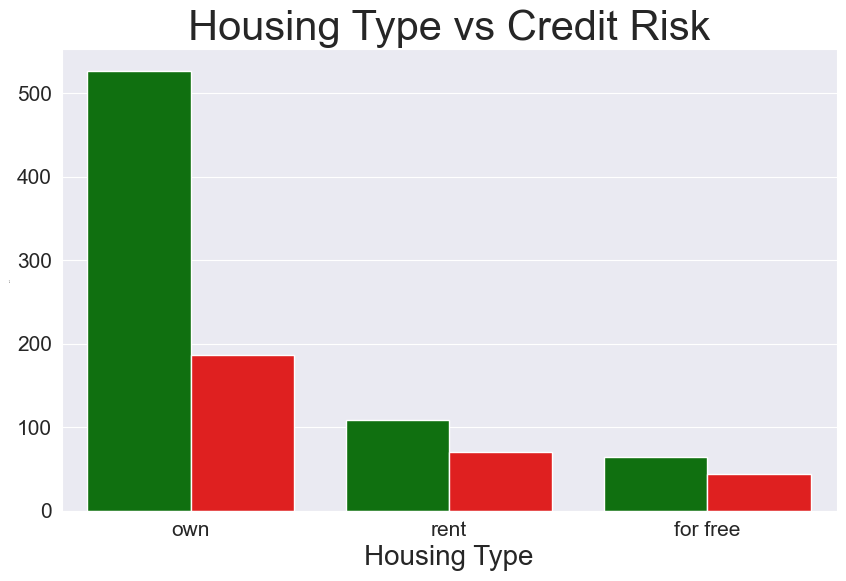

In [21]:
plt.figure(figsize=(10, 6))

sns.countplot(
    data=df,
    x='housing',
    hue='credit_risk',
    palette={'good': 'green', 'bad': 'red'},
    order=df['housing'].value_counts().index,
    legend=False
)

plt.title('Housing Type vs Credit Risk', fontsize=30)
plt.xlabel('Housing Type', fontsize=20)
plt.ylabel('Count', fontsize=0)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.show()

Credit Duration vs Risk - Are long-term loans riskier?

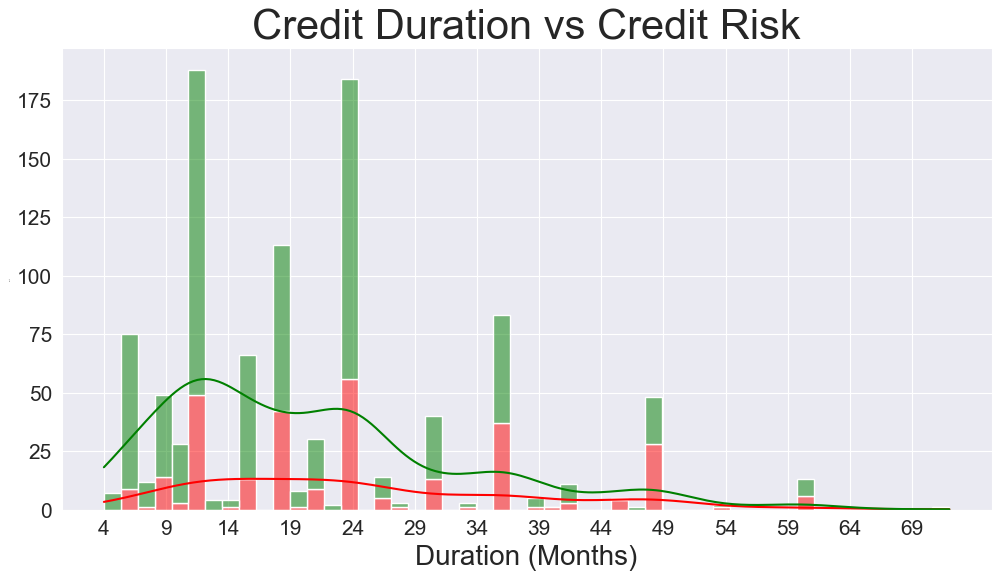

In [22]:
plt.figure(figsize=(12, 6))

sns.histplot(
    data=df,
    x='duration_months',
    hue='credit_risk',
    multiple='stack',
    bins=50,
    palette={'good': 'green', 'bad': 'red'},
    kde=True,
    legend=False,
)

plt.title('Credit Duration vs Credit Risk', fontsize=30)
plt.xlabel('Duration (Months)', fontsize=20)
plt.ylabel('Count', fontsize=0)
plt.yticks(fontsize=15)
min_duration = df['duration_months'].min()
max_duration = df['duration_months'].max()
plt.xticks(
    ticks=np.arange(min_duration, max_duration, 5),
    fontsize=15
)

plt.show()

Employment Duration vs Risk - do stable jobs mean safer clients?

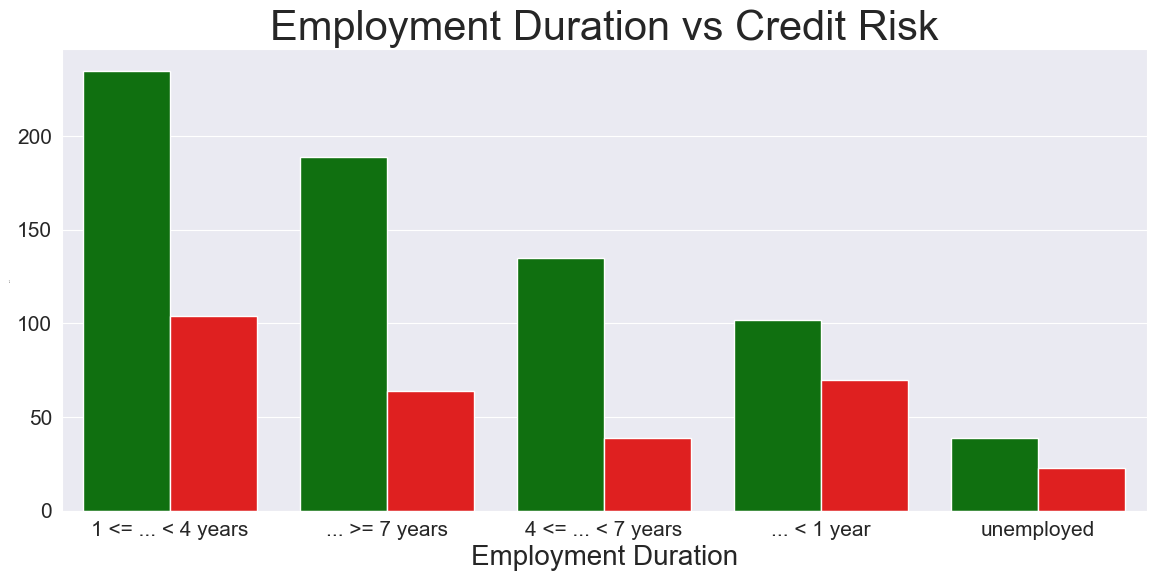

In [23]:
plt.figure(figsize=(14, 6))

sns.countplot(
    data=df,
    x='employment_since',
    hue='credit_risk',
    palette={'good': 'green', 'bad': 'red'},
    order=df['employment_since'].value_counts().index,
    legend=False
)

plt.title('Employment Duration vs Credit Risk', fontsize=30)
plt.xlabel('Employment Duration', fontsize=20)
plt.ylabel('Count', fontsize=0)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.show()

Correlation Matrix - which features are correlated?

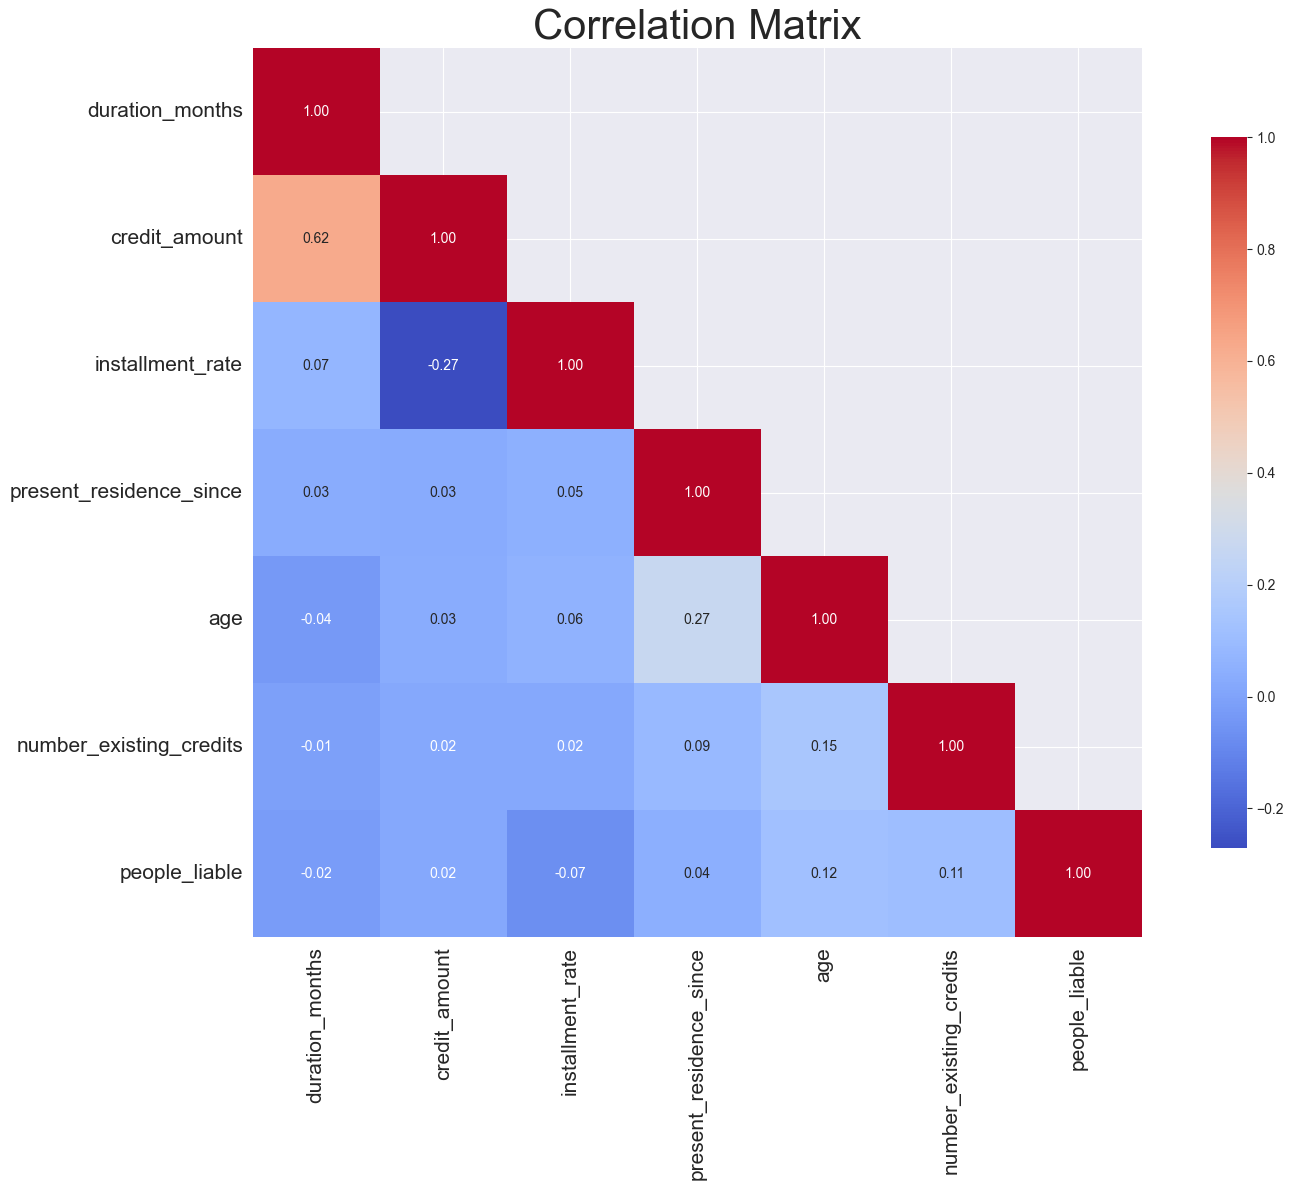

In [24]:
plt.figure(figsize=(16, 12))

correlation_matrix = df.corr(numeric_only=True)

sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt='.2f',
    cmap='coolwarm',
    square=True,
    cbar_kws={'shrink': .8},
    annot_kws={'size': 10},
    mask=np.triu(np.ones_like(correlation_matrix, dtype=bool), k=1)
)

plt.title('Correlation Matrix', fontsize=30)
plt.xticks(fontsize=15, rotation=90)
plt.yticks(fontsize=15, rotation=0)

plt.tight_layout()

plt.show()

### Data Cleaning

Missing values

In [29]:
df.isnull().sum()

status_account             0
duration_months            0
credit_history             0
purpose                    0
credit_amount              0
savings_account            0
employment_since           0
installment_rate           0
personal_status            0
other_debtors              0
present_residence_since    0
property                   0
age                        0
other_installment_plans    0
housing                    0
number_existing_credits    0
job                        0
people_liable              0
telephone                  0
foreign_worker             0
credit_risk                0
sex                        0
dtype: int64

Encode categorical variables

In [38]:
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded['credit_risk'] = df_encoded['credit_risk_good'].map({
    False: 0,
    True: 1
})

df_encoded = df_encoded.drop(columns=['credit_risk_good'], axis=1)
df_encoded.head()

,duration_months,credit_amount,installment_rate,present_residence_since,age,number_existing_credits,people_liable,status_account_0 <= ... < 200 DM,status_account_>= 200 DM / salary,status_account_no checking account,...,other_installment_plans_stores,housing_own,housing_rent,job_skilled employee/official,job_unemployed/unskilled - non-resident,job_unskilled - resident,"telephone_yes, registered under the customers name",foreign_worker_yes,sex_M,credit_risk
0,6,1169,4,4,67,2,1,False,False,False,...,False,True,False,True,False,False,True,True,True,1
1,48,5951,2,2,22,1,1,True,False,False,...,False,True,False,True,False,False,False,True,False,0
2,12,2096,2,3,49,1,2,False,False,True,...,False,True,False,False,False,True,False,True,True,1
3,42,7882,2,4,45,1,2,False,False,False,...,False,False,False,True,False,False,False,True,True,1
4,24,4870,3,4,53,2,2,False,False,False,...,False,False,False,True,False,False,False,True,True,0


Save cleaned data to CSV

In [40]:
df_encoded.to_csv('../data/german_prepared.csv', index=False)